## HMM-based POS tagging system.

In [ ]:
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time

nltk.download('treebank')

nltk.download('universal_tagset')

nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

print(nltk_data[:2])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [ ]:
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print((train_tagged_words))
print((test_tagged_words))

[('Drink', 'NOUN'), ('Carrier', 'NOUN'), ('Competes', 'VERB'), ('With', 'ADP'), ('Cartons', 'NOUN'), ('At', 'ADP'), ('last', 'ADJ'), ('count', 'NOUN'), (',', '.'), ('Candela', 'NOUN'), ('had', 'VERB'), ('sold', 'VERB'), ('$', '.'), ('4', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('of', 'ADP'), ('its', 'PRON'), ('medical', 'ADJ'), ('devices', 'NOUN'), ('in', 'ADP'), ('Japan', 'NOUN'), ('.', '.'), ('Mrs.', 'NOUN'), ('Hills', 'NOUN'), ('lauded', 'VERB'), ('South', 'NOUN'), ('Korea', 'NOUN'), ('for', 'ADP'), ('*-1', 'X'), ('creating', 'VERB'), ('an', 'DET'), ('intellectual-property', 'ADJ'), ('task', 'NOUN'), ('force', 'NOUN'), ('and', 'CONJ'), ('special', 'ADJ'), ('enforcement', 'NOUN'), ('teams', 'NOUN'), ('of', 'ADP'), ('police', 'NOUN'), ('officers', 'NOUN'), ('and', 'CONJ'), ('prosecutors', 'NOUN'), ('trained', 'VERB'), ('*', 'X'), ('to', 'PRT'), ('pursue', 'VERB'), ('movie', 'NOUN'), ('and', 'CONJ'), ('book', 'NOUN'), ('pirates', 'NOUN'), ('.', '.'), ('Section', 'NOUN'), ('501', 'NUM

In [ ]:
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)
vocab = {word for word,tag in train_tagged_words}

12
{'NUM', 'ADJ', 'NOUN', '.', 'CONJ', 'VERB', 'ADP', 'PRT', 'X', 'ADV', 'DET', 'PRON'}


In [ ]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)


    return (count_w_given_tag, count_tag)

In [ ]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [ ]:
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)):
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,NUM,ADJ,NOUN,.,CONJ,VERB,ADP,PRT,X,ADV,DET,PRON
NUM,0.184220,0.035345,0.351660,0.119243,0.014281,0.020707,0.037487,0.026062,0.202428,0.003570,0.003570,0.001428
ADJ,0.021748,0.063301,0.696893,0.066019,0.016893,0.011456,0.080583,0.011456,0.020971,0.005243,0.005243,0.000194
NOUN,0.009144,0.012584,0.262344,0.240094,0.042454,0.149134,0.176827,0.043935,0.028825,0.016895,0.013106,0.004659
.,0.078210,0.046132,0.218539,0.092372,0.060079,0.089690,0.092908,0.002789,0.025641,0.052569,0.172192,0.068769
CONJ,0.040615,0.113611,0.349067,0.035126,0.000549,0.150384,0.055982,0.004391,0.009330,0.057080,0.123491,0.060373
VERB,0.022836,0.066390,0.110589,0.034807,0.005433,0.167956,0.092357,0.030663,0.215930,0.083886,0.133610,0.035543
ADP,0.063275,0.107062,0.323589,0.038724,0.001012,0.008479,0.016958,0.001266,0.034548,0.014553,0.320931,0.069603
PRT,0.056751,0.082975,0.250489,0.045010,0.002348,0.401174,0.019569,0.001174,0.012133,0.009393,0.101370,0.017613
X,0.003075,0.017682,0.061695,0.160869,0.010379,0.206419,0.142226,0.185086,0.075726,0.025754,0.056890,0.054200
ADV,0.029868,0.130721,0.032196,0.139255,0.006982,0.339022,0.119472,0.014740,0.022886,0.081458,0.071373,0.012025


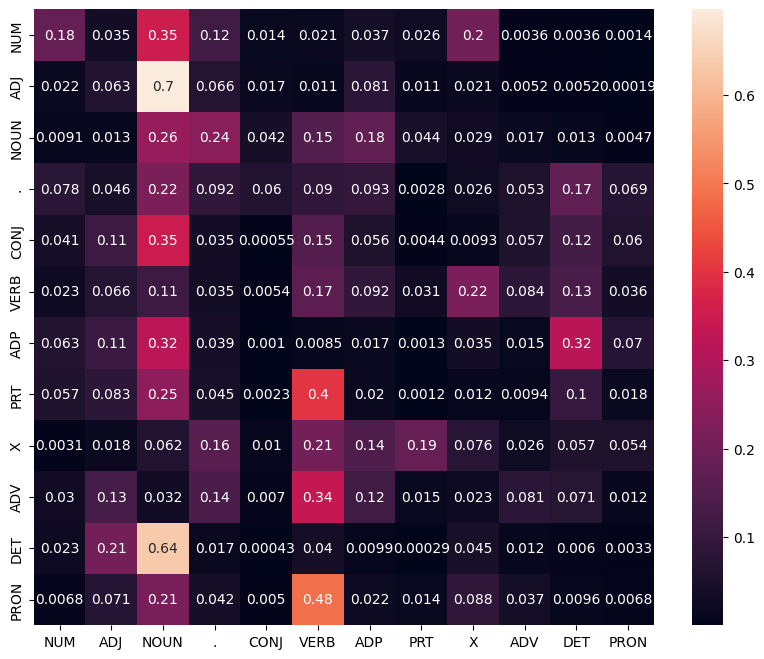

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(tags_df, annot=True)
plt.show()


In [ ]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]

            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p
            p.append(state_probability)

        pmax = max(p)
        state_max = T[p.index(pmax)]
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
random.seed(1234)

rndom = [random.randint(1,len(test_set)) for x in range(10)]

test_run = [test_set[i] for i in rndom]

test_run_base = [tup for sent in test_run for tup in sent]

test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [ ]:
tagged_seq = Viterbi(test_tagged_words)

check = [i for i, j in zip(tagged_seq, test_run_base) if i == j]

accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

Viterbi Algorithm Accuracy:  93.77990430622009


In [ ]:
texts = []
news_df = pd.read_csv('https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv',nrows =5000)
texts.extend(list(news_df.text.values))
texts = [h for h in texts if h != "Unknown"]
texts[0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [ ]:
test_sent=texts[0]
pred_tags= Viterbi(test_sent.split())
print(pred_tags)

[('Saurav', 'NUM'), ('Kant,', 'NUM'), ('an', 'DET'), ('alumnus', 'NUM'), ('of', 'ADP'), ('upGrad', 'NUM'), ('and', 'CONJ'), ("IIIT-B's", 'NUM'), ('PG', 'NUM'), ('Program', 'NOUN'), ('in', 'ADP'), ('Machine', 'NUM'), ('learning', 'NOUN'), ('and', 'CONJ'), ('Artificial', 'NUM'), ('Intelligence,', 'NUM'), ('was', 'VERB'), ('a', 'DET'), ('Sr', 'NUM'), ('Systems', 'NOUN'), ('Engineer', 'NUM'), ('at', 'ADP'), ('Infosys', 'NUM'), ('with', 'ADP'), ('almost', 'ADV'), ('5', 'NUM'), ('years', 'NOUN'), ('of', 'ADP'), ('work', 'NOUN'), ('experience.', 'NUM'), ('The', 'DET'), ('program', 'NOUN'), ('and', 'CONJ'), ("upGrad's", 'NUM'), ('360-degree', 'NUM'), ('career', 'NOUN'), ('support', 'NOUN'), ('helped', 'VERB'), ('him', 'PRON'), ('transition', 'NOUN'), ('to', 'PRT'), ('a', 'DET'), ('Data', 'NOUN'), ('Scientist', 'NUM'), ('at', 'ADP'), ('Tech', 'NUM'), ('Mahindra', 'NUM'), ('with', 'ADP'), ('90%', 'NUM'), ('salary', 'NOUN'), ('hike.', 'NUM'), ("upGrad's", 'NUM'), ('Online', 'NUM'), ('Power', 'NOU